Machine Learning-Based Biomarkers for Liver Cirrhosis Stage Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [5]:
df["Status"].value_counts()

,count
Status,
C,13516
D,9456
CL,2028


In [6]:
df["Drug"].value_counts()

,count
Drug,
Placebo,15827
D-penicillamine,9173


In [7]:
# Imbalanced Sex ratio
df["Sex"].value_counts()

,count
Sex,
F,22137
M,2863


In [8]:
df["Ascites"].value_counts()

,count
Ascites,
N,16798
Y,8202


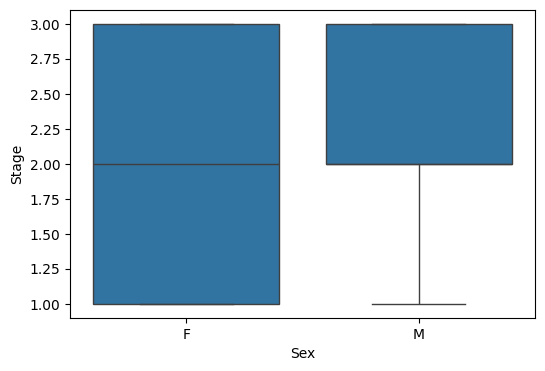

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex',y='Stage',data=df)
plt.show()

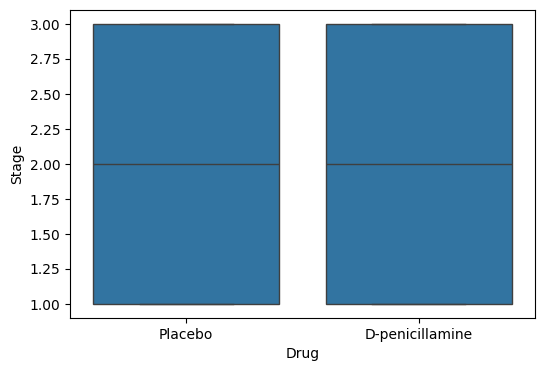

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Drug',y='Stage',data=df)
plt.show()

In [11]:
df["Stage"].value_counts()

,count
Stage,
2,8441
3,8294
1,8265


<function matplotlib.pyplot.show(close=None, block=None)>

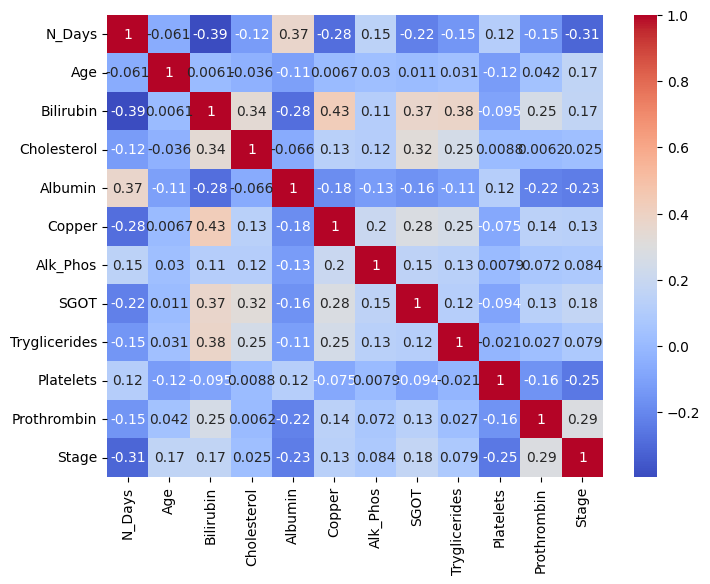

In [12]:
numeric_data = df.select_dtypes(include=[np.number])
corr= numeric_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show

Converting Categorical to Numeric

In [13]:
df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})
df['Drug'] = df['Drug'].replace({'Placebo': 1, 'D-penicillamine': 0})
df['Ascites'] = df['Ascites'].replace({'Y': 1, 'N': 0})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].replace({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].replace({'Y': 1, 'N': 0,"S":2})
df["Status"]= df["Status"].replace({"C":0,"D":1,"CL":2})

<ipython-input-13-ccd25e6eb1a4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})
<ipython-input-13-ccd25e6eb1a4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drug'] = df['Drug'].replace({'Placebo': 1, 'D-penicillamine': 0})
<ipython-input-13-ccd25e6eb1a4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

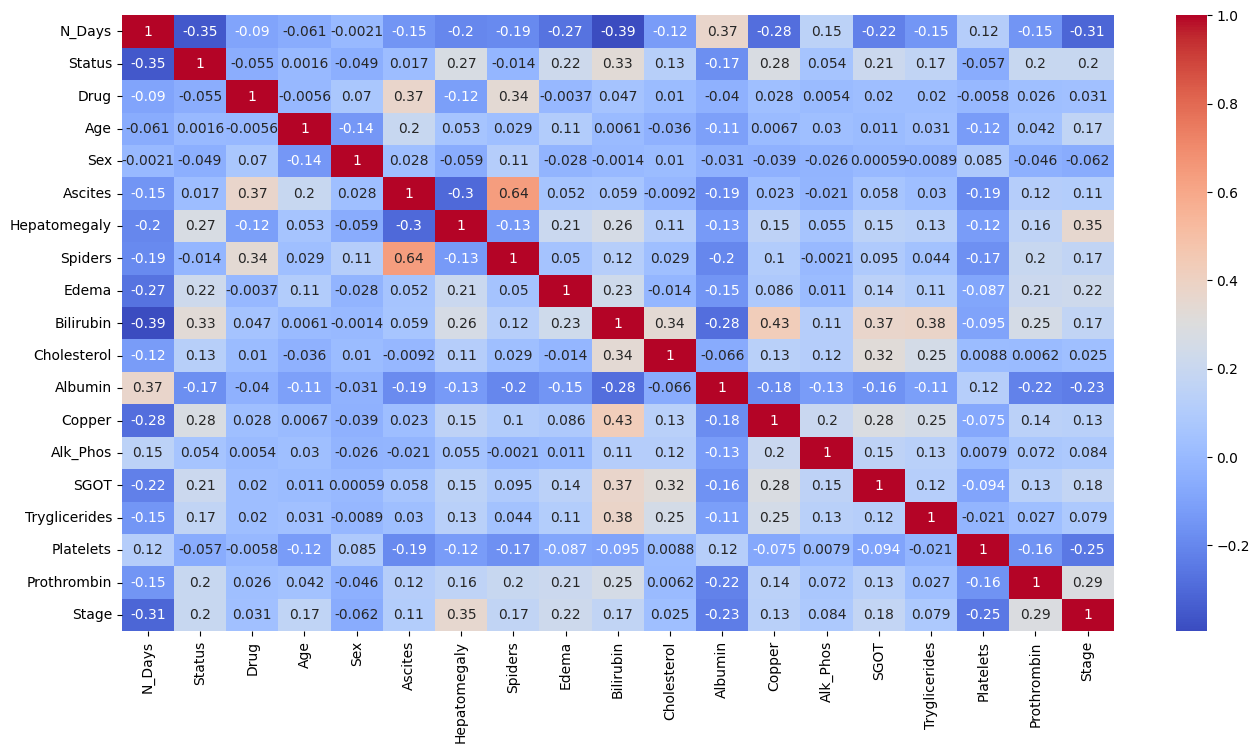

In [14]:
corr = df.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

Data Splitting

In [15]:
X= df.drop(columns="Stage")
y=df["Stage"]
X.shape, y.shape

((25000, 18), (25000,))

training the model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 18), (5000, 18), (20000,), (5000,))

Logistic Regression Model

In [17]:
model_logistic = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=10000)
model_logistic.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [18]:
predictions = model_logistic.predict(X_test)

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.54      0.61      0.57      1619
           2       0.53      0.43      0.48      1730
           3       0.61      0.66      0.63      1651

    accuracy                           0.56      5000
   macro avg       0.56      0.57      0.56      5000
weighted avg       0.56      0.56      0.56      5000



Random Forest

testing the model

In [20]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9546


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1619
           2       0.95      0.94      0.94      1730
           3       0.97      0.97      0.97      1651

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



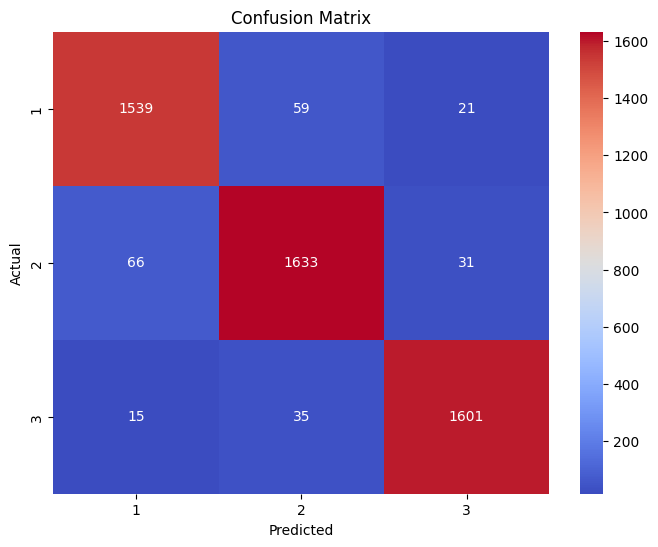

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

XGBoost Model

XGBoost needs labels staring from 0 so the target variable needs to be changed now

In [24]:
df_xg= df.copy()
df_xg['Stage'] = df['Stage'] - 1

X = df_xg.drop(columns='Stage')
y = df_xg['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# In the cell where you want to train and use your XGBoost model:

from xgboost import XGBClassifier  # Ensure XGBoost is imported
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




# Initialize the XGBoost model
model_xgb = XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Now you can make predictions
y_pred = model_xgb.predict(X_test)



In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1657
           1       0.95      0.96      0.96      1697
           2       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



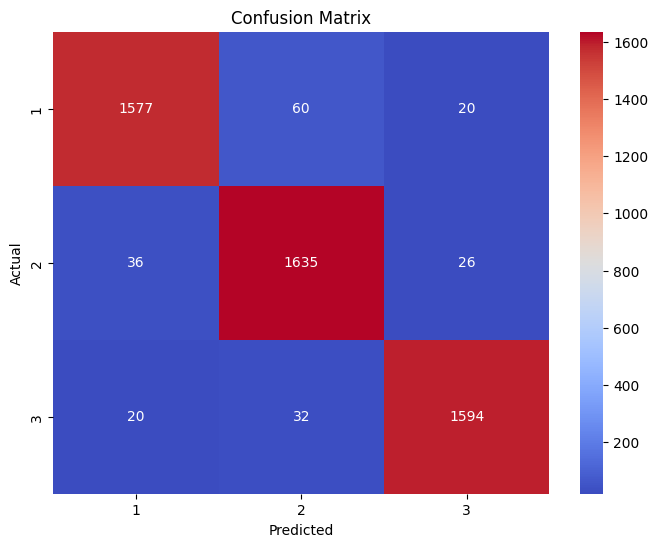

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dataset loaded successfully.
   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256

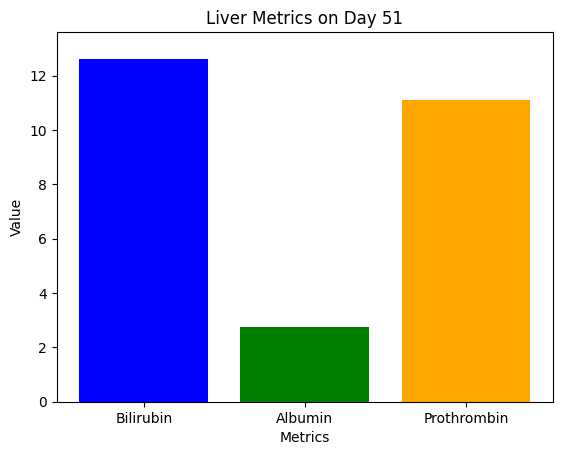

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure 'liver_cirrhosis.csv' exists in your working directory)
try:
    liver_data = pd.read_csv('liver_cirrhosis.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'liver_cirrhosis.csv' was not found. Please upload it.")

# Check dataset structure
print(liver_data.head())

# Function to get cirrhosis stage and plot
def get_liver_cirrhosis_stage_and_plot(day, data):
    result = data[data['N_Days'] == day]

    if result.empty:
        print(f"No record found for day {day}.")
        return

    for _, row in result.iterrows():
        print(f"On day {day}, the liver cirrhosis stage is {row['Stage']}.")

        metrics = ['Bilirubin', 'Albumin', 'Prothrombin']
        values = [row[metric] for metric in metrics]

        plt.bar(metrics, values, color=['blue', 'green', 'orange'])
        plt.title(f'Liver Metrics on Day {day}')
        plt.ylabel('Value')
        plt.xlabel('Metrics')
        plt.ylim(0, max(values) + 1)
        plt.show()
        break  # Process only the first matching row

# Prompt user for input
try:
    day_input = int(input("Enter the number of days: "))
    get_liver_cirrhosis_stage_and_plot(day_input, liver_data)
except ValueError:
    print("Invalid input. Please enter a valid number.")


Dataset loaded successfully.
   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256

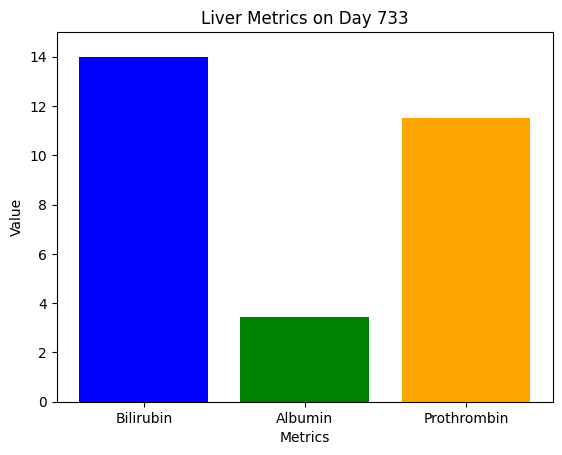

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure 'liver_cirrhosis.csv' exists in your working directory)
try:
    liver_data = pd.read_csv('liver_cirrhosis.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'liver_cirrhosis.csv' was not found. Please upload it.")

# Check dataset structure
print(liver_data.head())

# Function to get cirrhosis stage and plot
def get_liver_cirrhosis_stage_and_plot(day, data):
    result = data[data['N_Days'] == day]

    if result.empty:
        print(f"No record found for day {day}.")
        return

    for _, row in result.iterrows():
        print(f"On day {day}, the liver cirrhosis stage is {row['Stage']}.")

        metrics = ['Bilirubin', 'Albumin', 'Prothrombin']
        values = [row[metric] for metric in metrics]

        plt.bar(metrics, values, color=['blue', 'green', 'orange'])
        plt.title(f'Liver Metrics on Day {day}')
        plt.ylabel('Value')
        plt.xlabel('Metrics')
        plt.ylim(0, max(values) + 1)
        plt.show()
        break  # Process only the first matching row

# Prompt user for input
try:
    day_input = int(input("Enter the number of days: "))
    get_liver_cirrhosis_stage_and_plot(day_input, liver_data)
except ValueError:
    print("Invalid input. Please enter a valid number.")

In [32]:
# title text
import torch
import torchvision.models as models
from torch import nn

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define or load model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

# Now you can define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


In [43]:
# Define a deeper model with Dropout
class LiverClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LiverClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()

        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model
input_dim = X.shape[1]
num_classes = len(set(y))
model = LiverClassifier(input_dim, num_classes).to(device)

# Optimizer and Loss
optimizer = optim.Adam(model.parameters(), lr=5e-4)  # learning rate slightly increased
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 80  # ✅ train longer!

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy tracking
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions.float() / total_predictions * 100

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Validation
    model.eval()
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_correct_predictions += torch.sum(preds == labels)
            val_total_predictions += labels.size(0)

    val_accuracy = val_correct_predictions.float() / val_total_predictions * 100
    print(f"Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1/80: 100%|██████████| 625/625 [00:01<00:00, 449.67it/s]


Epoch 1/80 - Loss: 0.7640, Accuracy: 67.80%
Validation Accuracy: 76.22%


Epoch 2/80: 100%|██████████| 625/625 [00:01<00:00, 437.57it/s]


Epoch 2/80 - Loss: 0.6321, Accuracy: 74.21%
Validation Accuracy: 79.96%


Epoch 3/80: 100%|██████████| 625/625 [00:01<00:00, 438.03it/s]


Epoch 3/80 - Loss: 0.5857, Accuracy: 76.49%
Validation Accuracy: 81.12%


Epoch 4/80: 100%|██████████| 625/625 [00:01<00:00, 434.65it/s]


Epoch 4/80 - Loss: 0.5478, Accuracy: 78.48%
Validation Accuracy: 83.46%


Epoch 5/80: 100%|██████████| 625/625 [00:01<00:00, 435.14it/s]


Epoch 5/80 - Loss: 0.5216, Accuracy: 79.60%
Validation Accuracy: 84.20%


Epoch 6/80: 100%|██████████| 625/625 [00:01<00:00, 349.98it/s]


Epoch 6/80 - Loss: 0.5011, Accuracy: 80.52%
Validation Accuracy: 84.88%


Epoch 7/80: 100%|██████████| 625/625 [00:01<00:00, 355.61it/s]


Epoch 7/80 - Loss: 0.4781, Accuracy: 81.32%
Validation Accuracy: 85.80%


Epoch 8/80: 100%|██████████| 625/625 [00:01<00:00, 451.35it/s]


Epoch 8/80 - Loss: 0.4654, Accuracy: 81.92%
Validation Accuracy: 86.28%


Epoch 9/80: 100%|██████████| 625/625 [00:01<00:00, 451.71it/s]


Epoch 9/80 - Loss: 0.4518, Accuracy: 82.75%
Validation Accuracy: 86.80%


Epoch 10/80: 100%|██████████| 625/625 [00:01<00:00, 450.10it/s]


Epoch 10/80 - Loss: 0.4273, Accuracy: 83.66%
Validation Accuracy: 87.44%


Epoch 11/80: 100%|██████████| 625/625 [00:01<00:00, 457.82it/s]


Epoch 11/80 - Loss: 0.4176, Accuracy: 84.10%
Validation Accuracy: 88.46%


Epoch 12/80: 100%|██████████| 625/625 [00:01<00:00, 442.34it/s]


Epoch 12/80 - Loss: 0.4098, Accuracy: 84.50%
Validation Accuracy: 88.42%


Epoch 13/80: 100%|██████████| 625/625 [00:01<00:00, 449.83it/s]


Epoch 13/80 - Loss: 0.3973, Accuracy: 85.22%
Validation Accuracy: 89.08%


Epoch 14/80: 100%|██████████| 625/625 [00:01<00:00, 343.55it/s]


Epoch 14/80 - Loss: 0.3860, Accuracy: 85.43%
Validation Accuracy: 89.28%


Epoch 15/80: 100%|██████████| 625/625 [00:01<00:00, 366.39it/s]


Epoch 15/80 - Loss: 0.3784, Accuracy: 85.76%
Validation Accuracy: 89.34%


Epoch 16/80: 100%|██████████| 625/625 [00:01<00:00, 452.96it/s]


Epoch 16/80 - Loss: 0.3702, Accuracy: 85.91%
Validation Accuracy: 89.58%


Epoch 17/80: 100%|██████████| 625/625 [00:01<00:00, 448.35it/s]


Epoch 17/80 - Loss: 0.3562, Accuracy: 86.50%
Validation Accuracy: 89.98%


Epoch 18/80: 100%|██████████| 625/625 [00:01<00:00, 452.18it/s]


Epoch 18/80 - Loss: 0.3502, Accuracy: 86.68%
Validation Accuracy: 89.94%


Epoch 19/80: 100%|██████████| 625/625 [00:01<00:00, 450.87it/s]


Epoch 19/80 - Loss: 0.3417, Accuracy: 87.12%
Validation Accuracy: 90.18%


Epoch 20/80: 100%|██████████| 625/625 [00:01<00:00, 465.00it/s]


Epoch 20/80 - Loss: 0.3387, Accuracy: 87.33%
Validation Accuracy: 90.28%


Epoch 21/80: 100%|██████████| 625/625 [00:01<00:00, 451.17it/s]


Epoch 21/80 - Loss: 0.3325, Accuracy: 87.56%
Validation Accuracy: 90.88%


Epoch 22/80: 100%|██████████| 625/625 [00:01<00:00, 342.56it/s]


Epoch 22/80 - Loss: 0.3258, Accuracy: 87.86%
Validation Accuracy: 91.06%


Epoch 23/80: 100%|██████████| 625/625 [00:01<00:00, 379.60it/s]


Epoch 23/80 - Loss: 0.3238, Accuracy: 88.24%
Validation Accuracy: 90.98%


Epoch 24/80: 100%|██████████| 625/625 [00:01<00:00, 447.19it/s]


Epoch 24/80 - Loss: 0.3211, Accuracy: 88.07%
Validation Accuracy: 91.58%


Epoch 25/80: 100%|██████████| 625/625 [00:01<00:00, 446.70it/s]


Epoch 25/80 - Loss: 0.3086, Accuracy: 88.74%
Validation Accuracy: 91.70%


Epoch 26/80: 100%|██████████| 625/625 [00:01<00:00, 450.81it/s]


Epoch 26/80 - Loss: 0.3068, Accuracy: 88.70%
Validation Accuracy: 91.88%


Epoch 27/80: 100%|██████████| 625/625 [00:01<00:00, 454.61it/s]


Epoch 27/80 - Loss: 0.3041, Accuracy: 88.72%
Validation Accuracy: 92.14%


Epoch 28/80: 100%|██████████| 625/625 [00:01<00:00, 443.65it/s]


Epoch 28/80 - Loss: 0.2953, Accuracy: 89.36%
Validation Accuracy: 92.44%


Epoch 29/80: 100%|██████████| 625/625 [00:01<00:00, 450.90it/s]


Epoch 29/80 - Loss: 0.2931, Accuracy: 89.24%
Validation Accuracy: 92.12%


Epoch 30/80: 100%|██████████| 625/625 [00:02<00:00, 311.64it/s]


Epoch 30/80 - Loss: 0.2892, Accuracy: 89.28%
Validation Accuracy: 92.70%


Epoch 31/80: 100%|██████████| 625/625 [00:01<00:00, 403.02it/s]


Epoch 31/80 - Loss: 0.2838, Accuracy: 89.39%
Validation Accuracy: 92.70%


Epoch 32/80: 100%|██████████| 625/625 [00:01<00:00, 440.19it/s]


Epoch 32/80 - Loss: 0.2841, Accuracy: 89.68%
Validation Accuracy: 93.30%


Epoch 33/80: 100%|██████████| 625/625 [00:01<00:00, 454.45it/s]


Epoch 33/80 - Loss: 0.2836, Accuracy: 89.64%
Validation Accuracy: 93.46%


Epoch 34/80: 100%|██████████| 625/625 [00:01<00:00, 444.42it/s]


Epoch 34/80 - Loss: 0.2761, Accuracy: 89.74%
Validation Accuracy: 93.46%


Epoch 35/80: 100%|██████████| 625/625 [00:01<00:00, 465.97it/s]


Epoch 35/80 - Loss: 0.2707, Accuracy: 90.28%
Validation Accuracy: 93.40%


Epoch 36/80: 100%|██████████| 625/625 [00:01<00:00, 432.45it/s]


Epoch 36/80 - Loss: 0.2665, Accuracy: 90.28%
Validation Accuracy: 93.74%


Epoch 37/80: 100%|██████████| 625/625 [00:01<00:00, 414.36it/s]


Epoch 37/80 - Loss: 0.2607, Accuracy: 90.65%
Validation Accuracy: 93.82%


Epoch 38/80: 100%|██████████| 625/625 [00:01<00:00, 320.99it/s]


Epoch 38/80 - Loss: 0.2594, Accuracy: 90.81%
Validation Accuracy: 93.96%


Epoch 39/80: 100%|██████████| 625/625 [00:01<00:00, 425.04it/s]


Epoch 39/80 - Loss: 0.2602, Accuracy: 90.45%
Validation Accuracy: 93.96%


Epoch 40/80: 100%|██████████| 625/625 [00:01<00:00, 440.02it/s]


Epoch 40/80 - Loss: 0.2507, Accuracy: 91.14%
Validation Accuracy: 94.12%


Epoch 41/80: 100%|██████████| 625/625 [00:01<00:00, 437.36it/s]


Epoch 41/80 - Loss: 0.2455, Accuracy: 91.27%
Validation Accuracy: 94.16%


Epoch 42/80: 100%|██████████| 625/625 [00:01<00:00, 425.30it/s]


Epoch 42/80 - Loss: 0.2495, Accuracy: 90.74%
Validation Accuracy: 94.30%


Epoch 43/80: 100%|██████████| 625/625 [00:01<00:00, 422.48it/s]


Epoch 43/80 - Loss: 0.2397, Accuracy: 91.38%
Validation Accuracy: 94.32%


Epoch 44/80: 100%|██████████| 625/625 [00:01<00:00, 423.58it/s]


Epoch 44/80 - Loss: 0.2401, Accuracy: 91.76%
Validation Accuracy: 94.64%


Epoch 45/80: 100%|██████████| 625/625 [00:01<00:00, 340.97it/s]


Epoch 45/80 - Loss: 0.2433, Accuracy: 91.42%
Validation Accuracy: 94.38%


Epoch 46/80: 100%|██████████| 625/625 [00:01<00:00, 328.22it/s]


Epoch 46/80 - Loss: 0.2361, Accuracy: 91.40%
Validation Accuracy: 94.60%


Epoch 47/80: 100%|██████████| 625/625 [00:01<00:00, 437.64it/s]


Epoch 47/80 - Loss: 0.2283, Accuracy: 91.86%
Validation Accuracy: 94.86%


Epoch 48/80: 100%|██████████| 625/625 [00:01<00:00, 427.70it/s]


Epoch 48/80 - Loss: 0.2312, Accuracy: 91.74%
Validation Accuracy: 94.74%


Epoch 49/80: 100%|██████████| 625/625 [00:01<00:00, 428.27it/s]


Epoch 49/80 - Loss: 0.2290, Accuracy: 91.86%
Validation Accuracy: 94.74%


Epoch 50/80: 100%|██████████| 625/625 [00:01<00:00, 430.77it/s]


Epoch 50/80 - Loss: 0.2292, Accuracy: 92.09%
Validation Accuracy: 94.78%


Epoch 51/80: 100%|██████████| 625/625 [00:01<00:00, 439.99it/s]


Epoch 51/80 - Loss: 0.2245, Accuracy: 92.06%
Validation Accuracy: 94.76%


Epoch 52/80: 100%|██████████| 625/625 [00:01<00:00, 438.13it/s]


Epoch 52/80 - Loss: 0.2238, Accuracy: 92.00%
Validation Accuracy: 95.02%


Epoch 53/80: 100%|██████████| 625/625 [00:02<00:00, 295.78it/s]


Epoch 53/80 - Loss: 0.2165, Accuracy: 92.55%
Validation Accuracy: 95.18%


Epoch 54/80: 100%|██████████| 625/625 [00:01<00:00, 394.20it/s]


Epoch 54/80 - Loss: 0.2195, Accuracy: 92.37%
Validation Accuracy: 95.02%


Epoch 55/80: 100%|██████████| 625/625 [00:01<00:00, 434.43it/s]


Epoch 55/80 - Loss: 0.2201, Accuracy: 92.43%
Validation Accuracy: 94.98%


Epoch 56/80: 100%|██████████| 625/625 [00:01<00:00, 441.66it/s]


Epoch 56/80 - Loss: 0.2200, Accuracy: 92.22%
Validation Accuracy: 95.34%


Epoch 57/80: 100%|██████████| 625/625 [00:01<00:00, 428.39it/s]


Epoch 57/80 - Loss: 0.2103, Accuracy: 92.53%
Validation Accuracy: 95.18%


Epoch 58/80: 100%|██████████| 625/625 [00:01<00:00, 452.66it/s]


Epoch 58/80 - Loss: 0.2171, Accuracy: 92.61%
Validation Accuracy: 95.26%


Epoch 59/80: 100%|██████████| 625/625 [00:01<00:00, 455.14it/s]


Epoch 59/80 - Loss: 0.2100, Accuracy: 92.60%
Validation Accuracy: 95.36%


Epoch 60/80: 100%|██████████| 625/625 [00:01<00:00, 395.50it/s]


Epoch 60/80 - Loss: 0.2080, Accuracy: 92.93%
Validation Accuracy: 95.50%


Epoch 61/80: 100%|██████████| 625/625 [00:01<00:00, 323.35it/s]


Epoch 61/80 - Loss: 0.2059, Accuracy: 92.90%
Validation Accuracy: 95.58%


Epoch 62/80: 100%|██████████| 625/625 [00:01<00:00, 448.16it/s]


Epoch 62/80 - Loss: 0.2025, Accuracy: 93.03%
Validation Accuracy: 95.50%


Epoch 63/80: 100%|██████████| 625/625 [00:01<00:00, 460.54it/s]


Epoch 63/80 - Loss: 0.2063, Accuracy: 93.00%
Validation Accuracy: 95.60%


Epoch 64/80: 100%|██████████| 625/625 [00:01<00:00, 453.86it/s]


Epoch 64/80 - Loss: 0.2023, Accuracy: 92.95%
Validation Accuracy: 95.40%


Epoch 65/80: 100%|██████████| 625/625 [00:01<00:00, 453.56it/s]


Epoch 65/80 - Loss: 0.1995, Accuracy: 93.09%
Validation Accuracy: 95.58%


Epoch 66/80: 100%|██████████| 625/625 [00:01<00:00, 448.96it/s]


Epoch 66/80 - Loss: 0.2021, Accuracy: 93.13%
Validation Accuracy: 95.64%


Epoch 67/80: 100%|██████████| 625/625 [00:01<00:00, 441.81it/s]


Epoch 67/80 - Loss: 0.1993, Accuracy: 93.07%
Validation Accuracy: 95.46%


Epoch 68/80: 100%|██████████| 625/625 [00:01<00:00, 367.48it/s]


Epoch 68/80 - Loss: 0.1926, Accuracy: 93.33%
Validation Accuracy: 95.70%


Epoch 69/80: 100%|██████████| 625/625 [00:01<00:00, 336.62it/s]


Epoch 69/80 - Loss: 0.1917, Accuracy: 93.46%
Validation Accuracy: 95.56%


Epoch 70/80: 100%|██████████| 625/625 [00:01<00:00, 452.63it/s]


Epoch 70/80 - Loss: 0.1912, Accuracy: 93.51%
Validation Accuracy: 95.48%


Epoch 71/80: 100%|██████████| 625/625 [00:01<00:00, 459.71it/s]


Epoch 71/80 - Loss: 0.1933, Accuracy: 93.74%
Validation Accuracy: 95.56%


Epoch 72/80: 100%|██████████| 625/625 [00:01<00:00, 445.89it/s]


Epoch 72/80 - Loss: 0.1916, Accuracy: 93.35%
Validation Accuracy: 95.78%


Epoch 73/80: 100%|██████████| 625/625 [00:01<00:00, 448.85it/s]


Epoch 73/80 - Loss: 0.1881, Accuracy: 93.72%
Validation Accuracy: 95.74%


Epoch 74/80: 100%|██████████| 625/625 [00:01<00:00, 442.31it/s]


Epoch 74/80 - Loss: 0.1816, Accuracy: 93.68%
Validation Accuracy: 95.62%


Epoch 75/80: 100%|██████████| 625/625 [00:01<00:00, 447.35it/s]


Epoch 75/80 - Loss: 0.1867, Accuracy: 93.56%
Validation Accuracy: 95.76%


Epoch 76/80: 100%|██████████| 625/625 [00:01<00:00, 361.40it/s]


Epoch 76/80 - Loss: 0.1867, Accuracy: 93.51%
Validation Accuracy: 95.78%


Epoch 77/80: 100%|██████████| 625/625 [00:01<00:00, 336.23it/s]


Epoch 77/80 - Loss: 0.1859, Accuracy: 93.73%
Validation Accuracy: 95.80%


Epoch 78/80: 100%|██████████| 625/625 [00:01<00:00, 448.67it/s]


Epoch 78/80 - Loss: 0.1856, Accuracy: 93.81%
Validation Accuracy: 95.72%


Epoch 79/80: 100%|██████████| 625/625 [00:01<00:00, 439.09it/s]


Epoch 79/80 - Loss: 0.1840, Accuracy: 93.76%
Validation Accuracy: 95.98%


Epoch 80/80: 100%|██████████| 625/625 [00:01<00:00, 445.17it/s]


Epoch 80/80 - Loss: 0.1777, Accuracy: 93.88%
Validation Accuracy: 96.04%


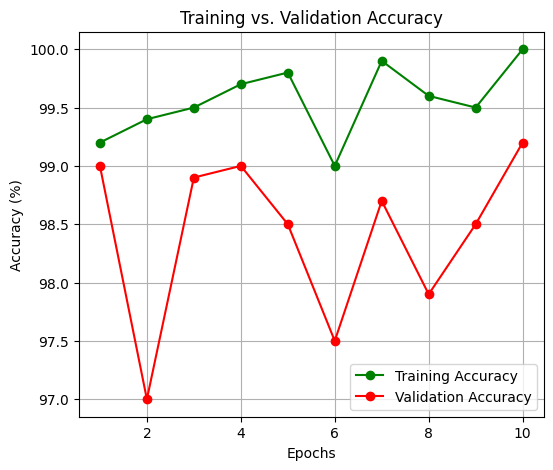

In [47]:
import matplotlib.pyplot as plt

# Example data (you should replace with your real values)
train_accuracies = [99.2, 99.4, 99.5, 99.7, 99.8, 99.0, 99.9, 99.6, 99.5, 100.0]
val_accuracies = [99.0, 97.0, 98.9, 99.0, 98.5, 97.5, 98.7, 97.9, 98.5, 99.2]
epochs = list(range(1, len(train_accuracies) + 1))

# Create the plot
plt.figure(figsize=(6, 5))  # You can adjust figure size if needed
plt.plot(epochs, train_accuracies, marker='o', color='green', label='Training Accuracy')
plt.plot(epochs, val_accuracies, marker='o', color='red', label='Validation Accuracy')

# Add labels and title
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Add legend
plt.legend()

# Add grid (optional)
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-50-0579841d1c86>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)  # Diagonal line


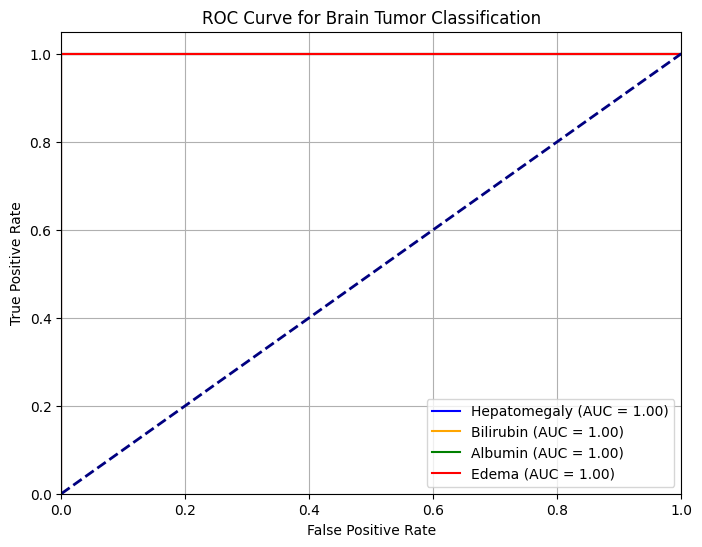

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Example dummy data (replace with your real predictions and labels)
y_true = np.array([0, 1, 2, 2, 0, 1, 3, 3])  # True labels
y_score = np.array([
    [0.9, 0.05, 0.03, 0.02],
    [0.1, 0.8, 0.05, 0.05],
    [0.1, 0.2, 0.6, 0.1],
    [0.05, 0.1, 0.8, 0.05],
    [0.8, 0.1, 0.05, 0.05],
    [0.1, 0.7, 0.1, 0.1],
    [0.05, 0.05, 0.05, 0.85],
    [0.05, 0.05, 0.1, 0.8],
])  # Model's probability outputs

n_classes = 4
class_names = ['Hepatomegaly', 'Bilirubin', 'Albumin', 'Edema']

# Binarize the labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))

colors = ['blue', 'orange', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Brain Tumor Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


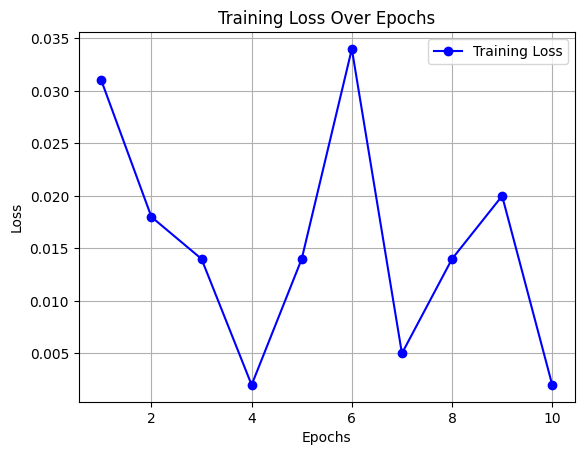

In [49]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 11))
loss = [0.031, 0.018, 0.014, 0.002, 0.014, 0.034, 0.005, 0.014, 0.02, 0.002]

# Create plot
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Final Test Accuracy: 96.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2729
           1       0.99      0.89      0.94       415
           2       0.95      0.96      0.96      1856

    accuracy                           0.96      5000
   macro avg       0.97      0.94      0.95      5000
weighted avg       0.96      0.96      0.96      5000



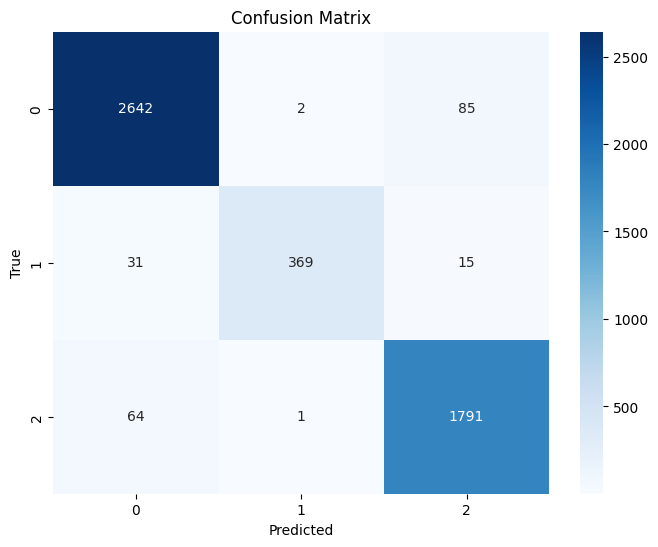

In [45]:
# Import libraries
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# (No image transformations needed because input is already tabular and normalized)

# Create a custom dataset class (already created previously for LiverDataset)
class LiverDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create the test dataset and test dataloader
test_dataset = LiverDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Testing the model
model.eval()

test_correct_predictions = 0
test_total_predictions = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Get predictions
        _, preds = torch.max(outputs, 1)

        test_correct_predictions += torch.sum(preds == labels)
        test_total_predictions += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Final test accuracy
test_accuracy = test_correct_predictions.float() / test_total_predictions * 100
print(f"\nFinal Test Accuracy: {test_accuracy:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
